In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os.path import join

In [2]:
sarl_dfs = [
    pd.read_csv(join("out", "data", "SARL", "two_inter", "unranked_10.csv")),
    pd.read_csv(join("out", "data", "SARL", "two_inter", "ranked_10.csv")),
    pd.read_csv(join("out", "data", "SARL", "single_inter", "unranked_9.csv")),
    pd.read_csv(join("out", "data", "SARL", "single_inter", "ranked_9.csv")),
    pd.read_csv(join("out", "data", "SARL", "complex_inter", "unranked_10.csv")),
    pd.read_csv(join("out", "data", "SARL", "complex_inter", "ranked_12.csv")),
    pd.read_csv(join("out", "data", "SARL", "boston", "unranked_1.csv")),
    pd.read_csv(join("out", "data", "SARL", "boston", "ranked_1.csv")),
]
marl_dfs = [
    pd.read_csv(join("out", "data", "MARL", "two_inter", "unranked_10.csv")),
    pd.read_csv(join("out", "data", "MARL", "two_inter", "ranked_10.csv")),
    pd.read_csv(join("out", "data", "MARL", "single_inter", "unranked_9.csv")),
    pd.read_csv(join("out", "data", "MARL", "single_inter", "ranked_10.csv")),
    pd.read_csv(join("out", "data", "MARL", "complex_inter", "unranked_10.csv")),
    pd.read_csv(join("out", "data", "MARL", "complex_inter", "ranked_13.csv")),
    pd.read_csv(join("out", "data", "MARL", "boston", "unranked_1.csv")),
    pd.read_csv(join("out", "data", "MARL", "boston", "ranked_1.csv")),
]
df = pd.concat(marl_dfs+sarl_dfs)
print(f"Data Columns: {df.columns}\n")
df.head()

Data Columns: Index(['Unnamed: 0', 'round', 'trainer', 'policy', 'episode_reward_max',
       'episode_reward_min', 'episode_reward_mean', 'episode_len_mean',
       'episode_media', 'episodes_this_iter', 'policy_reward_min',
       'policy_reward_max', 'policy_reward_mean', 'custom_metrics',
       'hist_stats', 'sampler_perf', 'off_policy_estimator',
       'num_healthy_workers', 'timesteps_total', 'agent_timesteps_total',
       'timers', 'info', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'config',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'perf', 'callback_ok'],
      dtype='object')



,Unnamed: 0,round,trainer,policy,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episode_media,episodes_this_iter,...,time_total_s,pid,hostname,node_ip,config,time_since_restore,timesteps_since_restore,iterations_since_restore,perf,callback_ok
0,0,0,MARL,gneJ12,-159.402778,-159.402778,-159.402778,2754.0,{},1,...,92.997150,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",92.997150,0,1,"{'cpu_util_percent': 16.995419847328243, 'ram_...",True
1,1,0,MARL,light1,-159.402778,-159.402778,-159.402778,2754.0,{},1,...,92.997150,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",92.997150,0,1,"{'cpu_util_percent': 16.995419847328243, 'ram_...",True
2,2,0,MARL,TEST-EVAL_POLICY,-159.402778,-159.402778,-159.402778,2754.0,{},1,...,92.997150,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",92.997150,0,1,"{'cpu_util_percent': 16.995419847328243, 'ram_...",True
3,3,1,MARL,gneJ12,-159.402778,-425.326389,-292.364583,2866.5,{},1,...,198.257493,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",198.257493,0,2,"{'cpu_util_percent': 18.70743243243243, 'ram_u...",True
4,4,1,MARL,light1,-159.402778,-425.326389,-292.364583,2866.5,{},1,...,198.257493,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",198.257493,0,2,"{'cpu_util_percent': 18.70743243243243, 'ram_u...",True


In [3]:
df["custom_metrics"]

0      {'edge_to_tls_action_comms___light1_mean': 0.0...
1      {'edge_to_tls_action_comms___light1_mean': 0.0...
2      {'edge_to_tls_action_comms___light1_mean': 0.0...
3      {'edge_to_tls_action_comms___light1_mean': 0.0...
4      {'edge_to_tls_action_comms___light1_mean': 0.0...
                             ...                        
195    {'edge_to_tls_action_comms___cluster_209579129...
196    {'edge_to_tls_action_comms___cluster_209579129...
197    {'edge_to_tls_action_comms___cluster_209579129...
198    {'edge_to_tls_action_comms___cluster_209579129...
199    {'edge_to_tls_action_comms___cluster_209579129...
Name: custom_metrics, Length: 8000, dtype: object

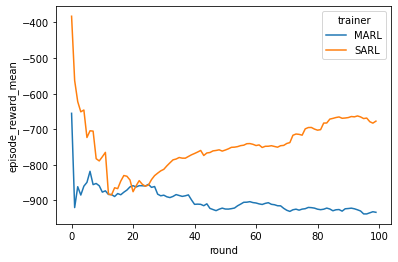

In [4]:
sns.lineplot(data=df, x="round", y="episode_reward_mean", hue="trainer", ci=None)
plt.show()

In [5]:
comm_df = df.copy()
comm_df.head()

,Unnamed: 0,round,trainer,policy,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episode_media,episodes_this_iter,...,time_total_s,pid,hostname,node_ip,config,time_since_restore,timesteps_since_restore,iterations_since_restore,perf,callback_ok
0,0,0,MARL,gneJ12,-159.402778,-159.402778,-159.402778,2754.0,{},1,...,92.997150,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",92.997150,0,1,"{'cpu_util_percent': 16.995419847328243, 'ram_...",True
1,1,0,MARL,light1,-159.402778,-159.402778,-159.402778,2754.0,{},1,...,92.997150,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",92.997150,0,1,"{'cpu_util_percent': 16.995419847328243, 'ram_...",True
2,2,0,MARL,TEST-EVAL_POLICY,-159.402778,-159.402778,-159.402778,2754.0,{},1,...,92.997150,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",92.997150,0,1,"{'cpu_util_percent': 16.995419847328243, 'ram_...",True
3,3,1,MARL,gneJ12,-159.402778,-425.326389,-292.364583,2866.5,{},1,...,198.257493,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",198.257493,0,2,"{'cpu_util_percent': 18.70743243243243, 'ram_u...",True
4,4,1,MARL,light1,-159.402778,-425.326389,-292.364583,2866.5,{},1,...,198.257493,17088,DESKTOP-NJNGBTT,172.31.40.24,"{'num_workers': 0, 'num_envs_per_worker': 1, '...",198.257493,0,2,"{'cpu_util_percent': 18.70743243243243, 'ram_u...",True


In [6]:
import ast

In [10]:
def sum_comm_cost(data):
    data = ast.literal_eval(data)
    return sum(data.values())

comm_df["custom_metrics"] = comm_df.apply(lambda row: sum_comm_cost(row["custom_metrics"]), axis=1)

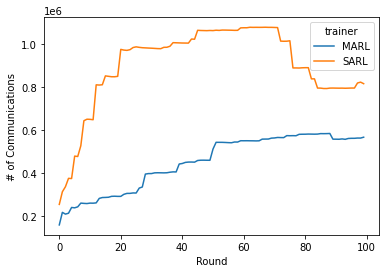

In [12]:
sns.lineplot(data=comm_df, x="round", y="custom_metrics", hue="trainer", ci=None)
plt.ylabel("# of Communications")
plt.xlabel("Round")
plt.show()